In [29]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

In [30]:
adata1 = sc.read_10x_h5("cell_feature_matrix.h5")
adata2 = sc.read_10x_h5("cell_feature_matrix2.h5")

In [31]:
dfC1 = pd.read_parquet("cells.parquet")
dfC2 = pd.read_parquet("cells2.parquet")

In [32]:
dfT1 = pd.read_parquet("transcripts.parquet")
dfT2 = pd.read_parquet("transcripts2.parquet")

In [33]:
dfT1.head()

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index,codeword_category,is_gene
0,281788509457311,UNASSIGNED,0,ACKR1,211.765625,3658.734375,12.296875,40.0,G1,363.640625,53,predesigned_gene,True
1,281788509415128,UNASSIGNED,0,ADAM17,244.750000,3648.156250,12.250000,20.5,G1,356.718750,304,predesigned_gene,True
2,281788509391871,UNASSIGNED,0,ADAM28,179.671875,3668.328125,12.343750,40.0,G1,373.890625,340,predesigned_gene,True
3,281788509332364,UNASSIGNED,0,AGR3,238.218750,3696.171875,12.359375,40.0,G1,317.875000,77,predesigned_gene,True
4,281788509358644,UNASSIGNED,0,AGR3,92.281250,3723.468750,12.468750,40.0,G1,395.828125,77,predesigned_gene,True


In [34]:
dfT2.head()

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index,codeword_category,is_gene
0,281891588936749,UNASSIGNED,0,VDAC2,195.812500,4999.968750,29.046875,40.0,H1,262.046875,11078,predesigned_gene,True
1,281891590204863,UNASSIGNED,0,CDV3,207.031250,5060.015625,28.671875,40.0,H1,208.625000,12432,predesigned_gene,True
2,281891588853709,UNASSIGNED,0,CHKA,127.718750,5092.062500,28.937500,40.0,H1,222.375000,18241,predesigned_gene,True
3,281891588737583,UNASSIGNED,0,CTDSPL,156.531250,5235.984375,29.156250,40.0,H1,117.093750,10912,predesigned_gene,True
4,281891589151731,UNASSIGNED,0,CTSH,212.328125,5083.984375,28.890625,40.0,H1,186.515625,7044,predesigned_gene,True


In [35]:
dfC1.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method
0,aaaadcac-1,315.479584,4135.815918,35,0,0,0,0,0,35,76.539847,6.863750,1,Segmented by nucleus expansion of 5.0µm
1,aaaaieak-1,317.920197,4126.272461,61,0,0,0,0,0,61,34.002657,12.688907,1,Segmented by nucleus expansion of 5.0µm
2,aaaanbhm-1,318.433136,4109.978027,292,0,0,0,0,0,292,128.514692,30.028907,1,Segmented by nucleus expansion of 5.0µm
3,aaaankfe-1,335.111847,4116.146484,303,1,0,0,0,0,304,85.796878,44.975627,1,Segmented by nucleus expansion of 5.0µm
4,aaaankfi-1,341.734100,4125.354980,32,0,0,0,0,0,32,63.038127,14.540313,1,Segmented by nucleus expansion of 5.0µm


In [36]:
dfC2.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,nucleus_count,segmentation_method
0,aaaaadnb-1,822.469055,5111.537598,226,0,0,0,0,0,226,44.659533,21.223438,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
1,aaaabalp-1,843.901428,5149.261230,108,0,0,0,0,0,108,32.196407,9.889219,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
2,aaaadfei-1,831.219421,5133.179199,265,0,0,0,0,3,268,47.504377,25.739063,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
3,aaaadjia-1,839.742981,5159.693848,328,0,0,0,0,1,329,37.253908,20.636407,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...
4,aaaafglb-1,784.250916,5143.785645,337,0,0,0,0,0,337,52.155471,27.274376,1,Segmented by boundary stain (ATP1A1+CD45+E-Cad...


In [37]:
genes1 = set(dfT1['feature_name'].dropna().unique())
genes2 = set(dfT2['feature_name'].dropna().unique())

In [38]:
common_genes = genes1 & genes2

In [39]:
print(f"Genes in dataset 1: {len(genes1)}")
print(f"Genes in dataset 2: {len(genes2)}")
print(f"Common genes: {len(common_genes)} ({len(common_genes)/len(genes1)*100:.2f}% of dataset 1)")

Genes in dataset 1: 541
Genes in dataset 2: 10029
Common genes: 232 (42.88% of dataset 1)


## Mapping/Aligning cells from both the datasets by Transcript Density-Based Mapping (Spatial Proximity + Expression Similarity)

Since two datasets may have different cell segmentation results, direct cell-to-cell matching is difficult

Map cells between two transcriptomic datasets by leveraging both:
1.	Spatial proximity (transcripts are physically located in space).
2.	Expression similarity (genes expressed in similar patterns should belong to the same cell).
Transcript Density-Based Mapping (Spatial Proximity + Expression Similarity)


**Step 1: Compute Transcript “Centers”**

Each transcript (dfT1, dfT2) has an associated (x, y) coordinate and belongs to a cell (cell_id).
However, since the cell segmentation may differ between the two datasets, we compute a “**center of mass**” for each cell.

This is done as:

$$x_{\text{center}} = \frac{\sum x_{\text{transcripts}}}{N_{\text{transcripts}}}, \quad y_{\text{center}} = \frac{\sum y_{\text{transcripts}}}{N_{\text{transcripts}}}$$

This step converts sparse transcript data into a more structured spatial representation of cells.

**Step 2: Find Closest Cells Between Datasets**

For each cell in Dataset 1 (dfC1), find the closest cell in Dataset 2 (dfC2) based on Euclidean distance.


In [40]:
# Compute transcript-based centroids for each cell
centroids1 = dfT1.groupby("cell_id")[["x_location", "y_location"]].mean().reset_index()
centroids2 = dfT2.groupby("cell_id")[["x_location", "y_location"]].mean().reset_index()

In [41]:
# Convert to numpy arrays for fast lookup
tree1 = cKDTree(centroids1[["x_location", "y_location"]].values)
tree2 = cKDTree(centroids2[["x_location", "y_location"]].values)

In [42]:
# Find nearest cell in dataset 2 for each cell in dataset 1
distances, indices = tree1.query(centroids2[["x_location", "y_location"]].values)

In [43]:
# Create a mapping from dataset 1 to dataset 2
cell_mapping = {centroids1.iloc[idx]["cell_id"]: centroids2.iloc[i]["cell_id"] 
                for i, idx in enumerate(indices)}

In [44]:
# Print some mappings
list(cell_mapping.items())[:10]

[('knljdkfl-1', 'UNASSIGNED'),
 ('aihocgoe-1', 'eljpgaeb-1'),
 ('akaikpnj-1', 'elincpmd-1'),
 ('akfiehag-1', 'oedmklld-1'),
 ('akaijagn-1', 'eliokpfc-1'),
 ('aihjekob-1', 'cikmcghp-1'),
 ('aihiiign-1', 'elijkllc-1'),
 ('aihohhcg-1', 'aaaakcim-1'),
 ('aihicekm-1', 'eliaaiap-1'),
 ('aijhikgl-1', 'aaaehmfj-1')]

In [45]:
# Save cell mapping to a text file
with open("cell_mapping.txt", "w") as f:
    for cell1, cell2 in cell_mapping.items():
        f.write(f"{cell1}\t{cell2}\n")

## Plotting to check

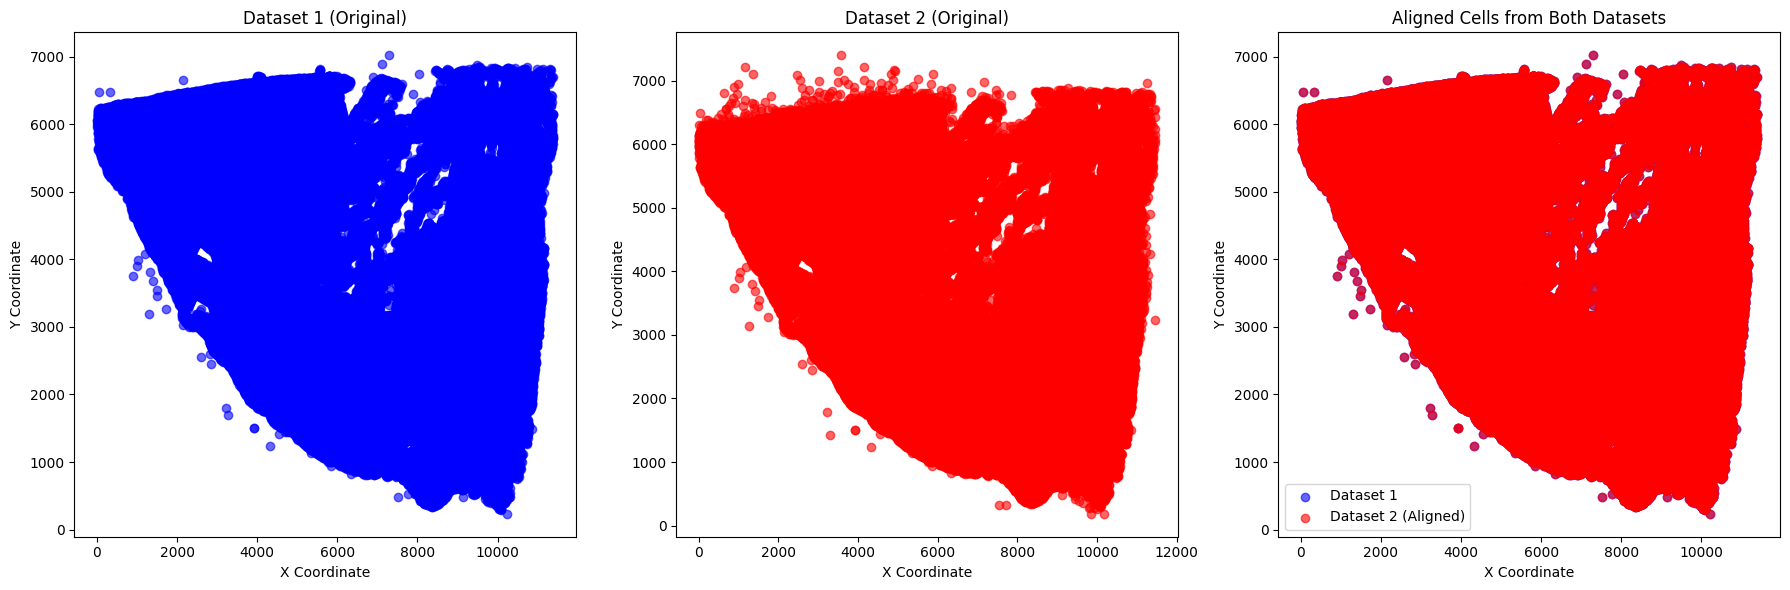

In [47]:
# Convert mapping into a DataFrame
cell_mapping_df = pd.DataFrame(cell_mapping.items(), columns=["cell_id_1", "cell_id_2"])

# Merge with dfC1 to get the x, y coordinates
dfC1_mapped = dfC1[dfC1["cell_id"].isin(cell_mapping_df["cell_id_1"])]
dfC2_mapped = dfC2[dfC2["cell_id"].isin(cell_mapping_df["cell_id_2"])]

# Assign the same coordinates from dfC1 to dfC2 using mapping
dfC2_mapped = dfC2_mapped.merge(cell_mapping_df, left_on="cell_id", right_on="cell_id_2")
dfC2_mapped = dfC2_mapped.merge(dfC1_mapped, 
                                left_on="cell_id_1", right_on="cell_id", 
                                suffixes=("_dataset2", "_dataset1"))

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Dataset 1
axs[0].scatter(dfC1_mapped["x_centroid"], dfC1_mapped["y_centroid"], c="blue", alpha=0.6)
axs[0].set_title("Dataset 1 (Original)")
axs[0].set_xlabel("X Coordinate")
axs[0].set_ylabel("Y Coordinate")

# Plot Dataset 2 (Original)
axs[1].scatter(dfC2_mapped["x_centroid_dataset2"], dfC2_mapped["y_centroid_dataset2"], c="red", alpha=0.6)
axs[1].set_title("Dataset 2 (Original)")
axs[1].set_xlabel("X Coordinate")
axs[1].set_ylabel("Y Coordinate")

# Plot Both Together (After Alignment)
axs[2].scatter(dfC1_mapped["x_centroid"], dfC1_mapped["y_centroid"], label="Dataset 1", alpha=0.6, c="blue")
axs[2].scatter(dfC2_mapped["x_centroid_dataset1"], dfC2_mapped["y_centroid_dataset1"], label="Dataset 2 (Aligned)", alpha=0.6, c="red")
axs[2].set_title("Aligned Cells from Both Datasets")
axs[2].set_xlabel("X Coordinate")
axs[2].set_ylabel("Y Coordinate")
axs[2].legend()

plt.tight_layout()
plt.show()

In [48]:
dfC2_mapped.head()

,cell_id_dataset2,x_centroid_dataset2,y_centroid_dataset2,transcript_counts_dataset2,control_probe_counts_dataset2,genomic_control_counts_dataset2,control_codeword_counts_dataset2,unassigned_codeword_counts_dataset2,deprecated_codeword_counts_dataset2,total_counts_dataset2,...,control_probe_counts_dataset1,genomic_control_counts_dataset1,control_codeword_counts_dataset1,unassigned_codeword_counts_dataset1,deprecated_codeword_counts_dataset1,total_counts_dataset1,cell_area_dataset1,nucleus_area_dataset1,nucleus_count_dataset1,segmentation_method_dataset1
0,aaaakcim-1,809.454773,5142.270020,219,0,0,0,0,0,219,...,0,0,0,0,0,13,65.792659,10.160157,1,Segmented by nucleus expansion of 5.0µm
1,aaaehmfj-1,828.282593,5197.455566,200,0,0,0,0,0,200,...,0,0,0,0,0,90,165.813756,28.674220,1,Segmented by nucleus expansion of 5.0µm
2,aaaicjlk-1,844.004883,5366.179688,1840,0,0,1,0,7,1848,...,0,0,0,0,0,587,280.510635,98.621254,1,Segmented by nucleus expansion of 5.0µm
3,aaaigibb-1,857.283752,5515.506348,2220,0,0,0,0,3,2223,...,0,0,0,0,0,8,122.012192,18.604376,1,Segmented by nucleus expansion of 5.0µm
4,aaaihplh-1,846.022278,5505.876953,2566,0,0,0,0,2,2568,...,0,0,0,0,0,4,45.065939,6.502500,1,Segmented by nucleus expansion of 5.0µm


In [49]:
dfC2_mapped.to_parquet('aligned_dataset.parquet')

In [50]:
dfC2_mapped.to_csv('aligned_dataset.csv')

## Further exploration
For alignment we can explore
**Transcript Profile Similarity (Expression Overlap + Correlation)**
- Each cell has a set of transcripts (genes), which define its molecular identity.
- We can create a gene expression profile for each cell and compute similarity using cosine or pearson correlation.

or a hybrid approach where we combine spatially and then refine by profile similarity